# Extract the MS2 scan and do signature neutral loss search

In [33]:
# !pip install pymzml
%matplotlib inline

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pymzml

In [4]:
# https://github.com/shuzhao-li/asari/blob/284d49db05bc95377072a865663550f59340aca3/asari/tools/plot.py
def get_plot_region_from_file(infile, min_scan_number, max_scan_number, min_mz, max_mz, ms_level=1):
    '''
    input
    -----
    infile: mzML file as input
    return 
    ------
    list, [(scan_number, mz, intensity value), ...]
    '''
    alldata = []
    exp = pymzml.run.Reader(infile)
    ii = 0   # scan_number starts with 0
    for spec in exp:
        if min_scan_number < ii < max_scan_number:
            if spec.ms_level == ms_level:
                _NN = spec.mz.size
                for jj in range(_NN):
                    if min_mz < spec.mz[jj] < max_mz:
                        alldata.append((ii, spec.mz[jj], int(spec.i[jj])))
                
        ii += 1
    return alldata


In [101]:
infile = "../../../../MS_MS_raw_mzML/AX_RPneg_TDcells/mzML/ID_02.mzML"

In [19]:
exp = pymzml.run.Reader(infile)

[Warning] Not index found and build_index_from_scratch is False


# Basic information

In [20]:
# How many spectra
exp.get_spectrum_count()

4009

In [21]:
exp.ms_precisions # ms-level 1: ppm 5; ms-level 2: ppm 20?

{None: 0.0001, 0: 0.0001, 1: 5e-06, 2: 2e-05}

##### summary
- a probably 12 min run (720 secs) for 4008 scans

In [102]:
get_plot_region_from_file(infile, 
                          min_scan_number = 1600, 
                          max_scan_number = 1800, 
                          min_mz = 834.5200, 
                          max_mz = 834.5300, 
                          ms_level=2)

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


[(1684, 834.5263061523438, 478981), (1704, 834.5263671875, 715394)]

In [104]:
import pymzml
import matplotlib.pyplot as plt

def plot_ms2_scan(filename, scan_number):
    """Plot a specific MS2 scan from a mzML file using pymzML.

    Args:
        filename (str): Path to the mzML file.
        scan_number (int): The scan number of the MS2 scan to plot.

    Returns:
        None.
    """
    # Load the mzML file
    run = pymzml.run.Reader(filename)

    # Iterate through the scans in the file
    for spectrum in run:
        # Check if the scan is an MS2 scan with the specified scan number
        if spectrum['ms level'] == 2 and spectrum['id'] == scan_number:
            # Get the m/z and intensity values for the MS2 spectrum
            mz_values = spectrum.mz
            intensity_values = spectrum.i

            # Plot the MS2 spectrum
            plt.plot(mz_values, intensity_values)
            plt.title(f"MS2 scan {scan_number}")
            plt.xlabel("m/z")
            plt.ylabel("Intensity")
            plt.show()

            break  # Stop iterating through the scans once the desired scan is found

In [105]:
# Load the mzML file
run = pymzml.run.Reader(infile)

# Iterate through the scans in the file
for spectrum in run:
    # Check if the scan is an MS2 scan with the specified scan number
    if spectrum['ms level'] == 2 and spectrum['id'] == 1704:
        # Get the m/z and intensity values for the MS2 spectrum

        # Plot the MS2 spectrum
        plt.bar(spectrum.mz, spectrum.i)
        plt.title(f"MS2 scan {scan_number}")
        plt.xlabel("m/z")
        plt.ylabel("Intensity")
        plt.show()

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False


In [111]:
spectrums = [spectrum for spectrum in run if spectrum['ms level'] == 2]

[Warning] Not index found and build_index_from_scratch is False


In [116]:
spectrum.selected_precursors

[{'mz': 417.320373535156, 'charge': 1, 'precursor id': '2'}]

In [114]:
spectrum = spectrums[0]

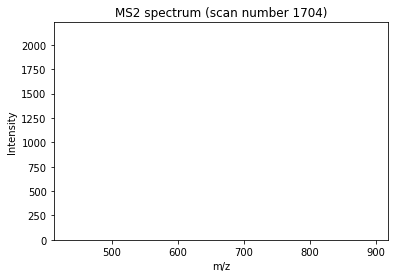

In [73]:
# Get the m/z and intensity values for the spectrum
mz_values = spectrum.mz
intensity_values = spectrum.i

# Sort the m/z and intensity values by ascending m/z values
indices = np.argsort(mz_values)
mz_values = mz_values[indices]
intensity_values = intensity_values[indices]

# Create a vertical bar plot of the spectrum
plt.bar(mz_values, intensity_values, align='center', width=0.1)
plt.title(f"MS2 spectrum (scan number {1704})")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()




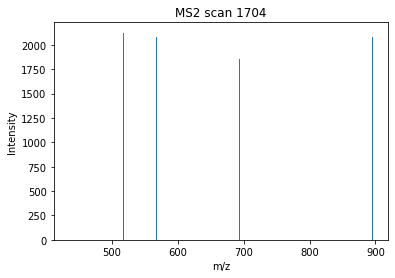

In [123]:
import matplotlib.pyplot as plt

plt.bar([435.02883911, 517.17883301, 548.85778809, 567.3213501 , 694.06628418, 896.10949707], 
        [2100.06201172, 2124.39208984, 1945.05871582, 2084.15356445, 1850.16674805, 2077.42773438],width = 1)
plt.title(f"MS2 scan {1704}")
plt.xlabel("m/z")
plt.ylabel("Intensity")
plt.show()